In [37]:
import os
import re
import sys
import matplotlib.pyplot as plt

sys.path.append("../")

In [56]:
PATH = "../logs/train_highway_augmenter/no_glu_skip_embeddings_over_mask"
ARTICLES_PATH = os.path.join(PATH, "articles.log")
POLARITY_PATH = os.path.join(PATH, "polarity.log")
SMOKERS_PATH = os.path.join(PATH, "smokers.log")

def extract_masking_logs(file):
    best_hparams_line = ''
    # read lines from log
    with open(file) as f:
        lines = f.readlines()
        lines = [line.strip() for line in lines]

    # get best model
    for line in reversed(lines):
        if "Finished training model. Best hyperparameters:" in line:
            best_hparams_line = line
            break
    
    assert len(best_hparams_line) > 0, "No best model logs."

    # best model hyperparams in string format
    best_hparams_str = re.findall(r"{.*}", best_hparams_line)[0]

    # find logs of the best model (MUST start with hparam string)
    # find lower line_id
    start_line_id = [i for i in range(len(lines)) if best_hparams_str in lines[i]][0]
    
    # find the end of the experiment (separated by second line of =====)
    end_line_id = start_line_id + [i for i in range(len(lines[start_line_id:])) if '=' * 10 in lines[i+start_line_id]][1]

    best_logs = lines[start_line_id:end_line_id]

    # keep only validation masking ratio
    masked_ratios = [float(line.split()[-1]) for line in best_logs if "end of epoch" in line]

    # check if early stopping was used and remove last 25 epochs
    for line in reversed(lines[start_line_id:end_line_id]):
        if "f1-score has not improved" in line:
            masked_ratios = masked_ratios[:-24]


    # best_hparams = json.loads(best_hparams_str.lower().replace("'", '"'))
    return masked_ratios

articles = extract_masking_logs(ARTICLES_PATH)
polarity = extract_masking_logs(POLARITY_PATH)
smokers = extract_masking_logs(SMOKERS_PATH)

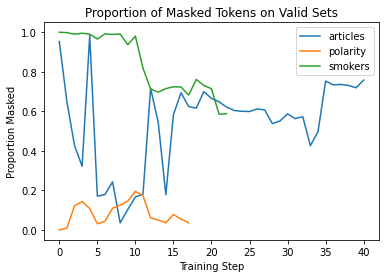

In [57]:
plt.plot(articles, label="articles")
plt.plot(polarity, label="polarity")
plt.plot(smokers, label="smokers")
plt.title("Proportion of Masked Tokens on Valid Sets")
plt.xlabel("Training Step")
plt.ylabel("Proportion Masked")
plt.legend()
plt.show()

In [33]:
masked_ratios

['0.953',
 '0.649',
 '0.427',
 '0.322',
 '0.984',
 '0.171',
 '0.179',
 '0.243',
 '0.036',
 '0.103',
 '0.167',
 '0.181',
 '0.716',
 '0.545',
 '0.178',
 '0.583',
 '0.694',
 '0.624',
 '0.616',
 '0.700',
 '0.665',
 '0.648',
 '0.621',
 '0.604',
 '0.600',
 '0.599',
 '0.612',
 '0.607',
 '0.538',
 '0.551',
 '0.587',
 '0.563',
 '0.573',
 '0.426',
 '0.497',
 '0.753',
 '0.734',
 '0.736',
 '0.731',
 '0.719',
 '0.758']